In [21]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/time_series_data (3).csv')

# Check the first few rows of the dataset to understand its structure
df.head()


,Country,Year,Date,Deaths,GDP_per_Capita,Democracy score
0,Afghanistan,2020,2020-01-22,0,512.055098,2.85
1,Afghanistan,2020,2020-01-23,0,512.055098,2.85
2,Afghanistan,2020,2020-01-24,0,512.055098,2.85
3,Afghanistan,2020,2020-01-25,0,512.055098,2.85
4,Afghanistan,2020,2020-01-26,0,512.055098,2.85


In [22]:

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Overview of the columns and data types
data_info = df.info()

# Drop rows with any missing values
df_cleaned = df.dropna()



Missing Values in Each Column:
 Country               0
Year                  0
Date                  0
Deaths                0
GDP_per_Capita     1119
Democracy score       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104676 entries, 0 to 104675
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Country          104676 non-null  object 
 1   Year             104676 non-null  int64  
 2   Date             104676 non-null  object 
 3   Deaths           104676 non-null  int64  
 4   GDP_per_Capita   103557 non-null  float64
 5   Democracy score  104676 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ MB

Data Overview after Dropping Rows with Missing Values:
<class 'pandas.core.frame.DataFrame'>
Index: 103557 entries, 0 to 104675
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Cou

In [23]:
num_rows = df_cleaned.shape[0]
print(num_rows)


103557


In [25]:
# Convert 'Date' to datetime
df_cleaned['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
df_cleaned['Date'].dtype


<ipython-input-25-c7974d8db300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df['Date'])


dtype('<M8[ns]')

In [26]:
# Group by 'Country' and sum the COVID deaths
country_deaths = df_cleaned.groupby('Country')['Deaths'].sum()

# Top 10 countries with the most COVID deaths
most_deaths_top_10 = country_deaths.sort_values(ascending=False).head(10)

# Top 10 countries with the least COVID deaths but greater than 1
least_deaths_top_10 = country_deaths[country_deaths > 1].sort_values(ascending=True).head(10)

# Display results
print("Top 10 countries with the most COVID-19 deaths:\n", most_deaths_top_10)
print("\nTop 10 countries with the least COVID-19 deaths (greater than 1):\n", least_deaths_top_10)



Top 10 countries with the most COVID-19 deaths:
 Country
Brazil            210341188
India             149225679
Mexico            106878706
Peru               82462595
United Kingdom     61667040
Italy              57258131
France             50552160
Colombia           42888669
Spain              39355274
Argentina          38076755
Name: Deaths, dtype: int64

Top 10 countries with the least COVID-19 deaths (greater than 1):
 Country
Bhutan                        736
Burundi                      8013
Iceland                     15889
New Zealand                 17607
Cuba                        26652
Guinea-Bissau               43460
Central African Republic    46282
Benin                       51920
Sierra Leone                54696
Comoros                     54915
Name: Deaths, dtype: int64


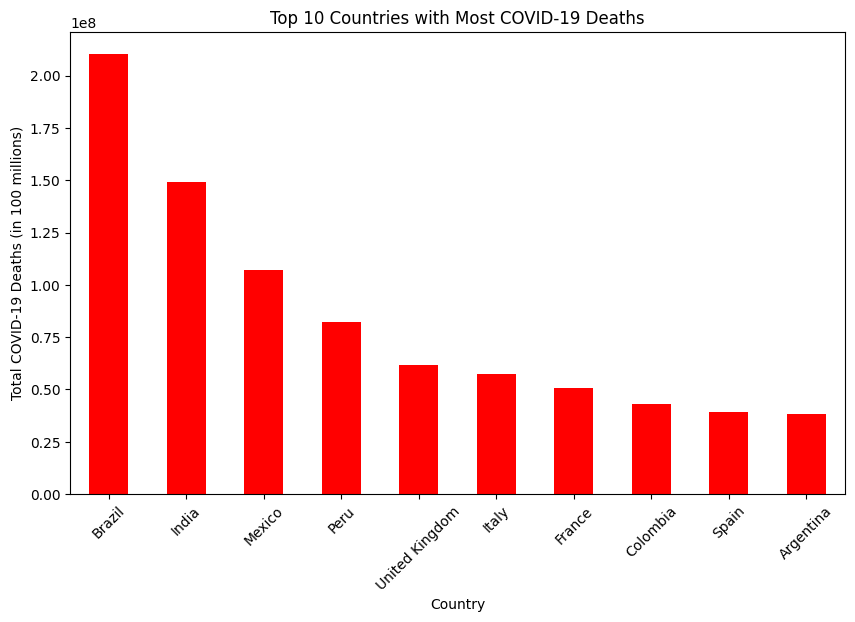

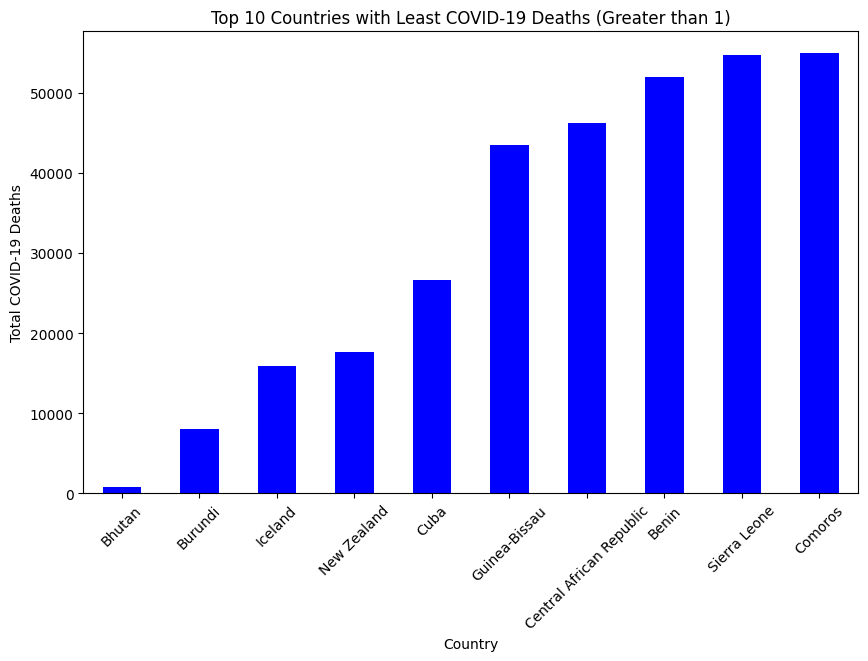

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plot top 10 most deaths
plt.figure(figsize=(10, 6))
most_deaths_top_10.plot(kind='bar', color='red')
plt.title('Top 10 Countries with Most COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Deaths (in 100 millions)')
plt.xticks(rotation=45)

# Ensure that the y-axis shows all digits (no formatting)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Plot top 10 least deaths (greater than 1)
plt.figure(figsize=(10, 6))
least_deaths_top_10.plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Least COVID-19 Deaths (Greater than 1)')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()


In [30]:
# Calculate the average GDP per capita
average_gdp = df_cleaned['GDP_per_Capita'].mean()
print("Average GDP per capita:", average_gdp)

Average GDP per capita: 15763.157038961346


In [34]:
# Calculate correlation between GDP and COVID deaths
gdp_deaths = df_cleaned.groupby('Country').agg(
    Average_GDP_Per_Capita=('GDP_per_Capita', 'mean'),
    Total_Deaths=('Deaths', 'sum')
).reset_index()
gdp_deaths_corr = gdp_deaths[['Average_GDP_Per_Capita', 'Total_Deaths']].corr().iloc[0, 1]
print("Correlation between GDP and COVID deaths:", gdp_deaths_corr)

Correlation between GDP and COVID deaths: 0.0006630104721006202


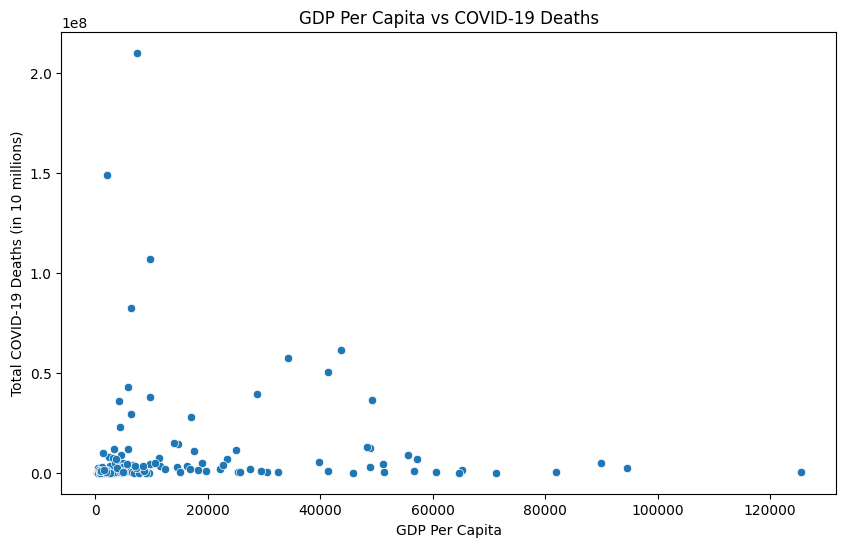

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot showing the relationship between GDP per capita and COVID deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_deaths, x='Average_GDP_Per_Capita', y='Total_Deaths')
plt.title('GDP Per Capita vs COVID-19 Deaths')
plt.xlabel('GDP Per Capita')
plt.ylabel('Total COVID-19 Deaths (in 10 millions)')  # Adjust the label to show the actual count
plt.show()


<ipython-input-69-66432e59e684>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_deaths = gdp_death.groupby('GDP_Category')['Total_Deaths'].mean().reset_index()
<ipython-input-69-66432e59e684>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_deaths, x='GDP_Category', y='Total_Deaths', palette='coolwarm')


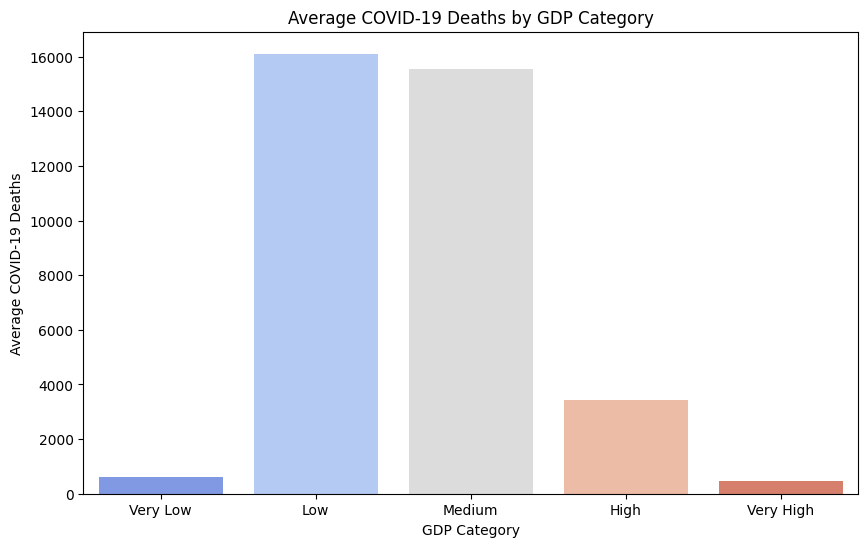

In [69]:


# Group by Country to calculate Average GDP per Capita and Total Deaths
gdp_death = df_cleaned.groupby('Country').agg(
    Average_GDP_Per_Capita=('GDP_per_Capita', 'mean'),
    Total_Deaths=('Deaths', 'mean')
).reset_index()

# Define bins and labels for GDP categorization
bins = [0, 1000, 10000, 50000, 100000, 130000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Categorize GDP per capita
gdp_death['GDP_Category'] = pd.cut(gdp_death['Average_GDP_Per_Capita'], bins=bins, labels=labels, right=True)

# Calculate average deaths per GDP category
average_deaths = gdp_death.groupby('GDP_Category')['Total_Deaths'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_deaths, x='GDP_Category', y='Total_Deaths', palette='coolwarm')
plt.title('Average COVID-19 Deaths by GDP Category')
plt.xlabel('GDP Category')
plt.ylabel('Average COVID-19 Deaths')  # Specify "Average"
plt.show()







In [42]:
# Calculate the average democracy score
average_democracy = df_cleaned['Democracy score'].mean()
print("Average democracy score:", average_democracy)

Average democracy score: 5.577001458134168


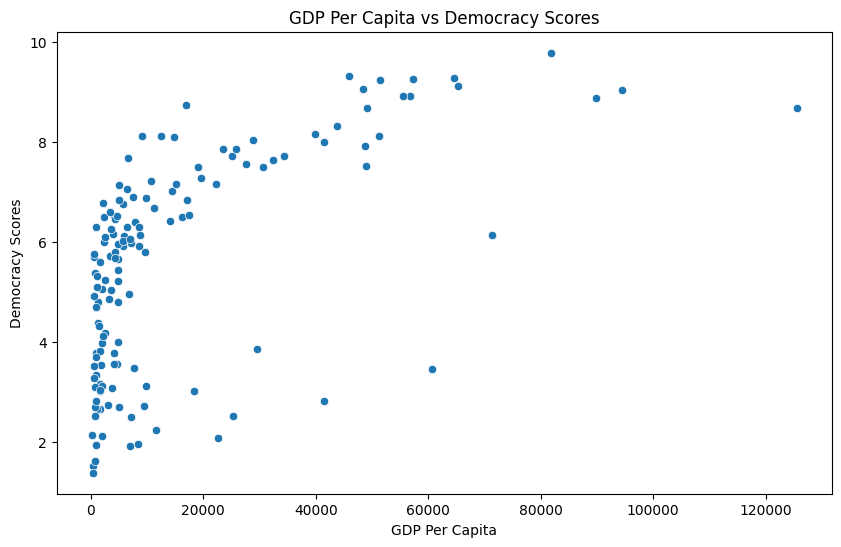

Correlation between GDP and Democracy Scores: 0.5882043635314301


In [45]:

# GDP per capita vs Democracy Scores
# Group by country
gdp_dem = df.groupby('Country').agg(
    Average_Democracy_Scores=('Democracy score', 'mean'),
    Average_GDP_Per_Capita=('GDP_per_Capita', 'mean')
).reset_index()
# print(df2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_dem, x='Average_GDP_Per_Capita', y='Average_Democracy_Scores')
plt.title('GDP Per Capita vs Democracy Scores')
plt.xlabel('GDP Per Capita')
plt.ylabel('Democracy Scores')
plt.show()

# Find correlation
gdp_dem_corr = gdp_dem[['Average_GDP_Per_Capita', 'Average_Democracy_Scores']].corr().iloc[0, 1]
print("Correlation between GDP and Democracy Scores:", gdp_dem_corr)




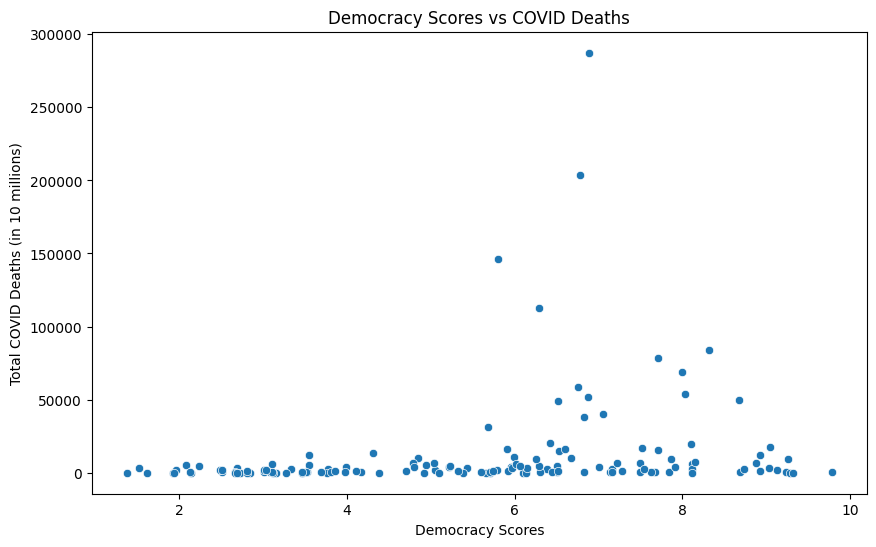

In [60]:
# Scatter plot for Democracy scores and COVID deaths
dem_deaths = df_cleaned.groupby('Country').agg(
    Democracy_Scores=('Democracy score', 'mean'),
    Total_Deaths=('Deaths', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dem_deaths, x='Democracy_Scores', y='Total_Deaths')
plt.title('Democracy Scores vs COVID Deaths')
plt.xlabel('Democracy Scores')
plt.ylabel('Total COVID Deaths (in 10 millions)')
plt.show()


<ipython-input-62-7efa7151683e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_dem_deaths = dem_deaths.groupby('Democracy_Category').agg(
<ipython-input-62-7efa7151683e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_dem_deaths, x='Democracy_Category', y='Total_Deaths', palette='coolwarm')


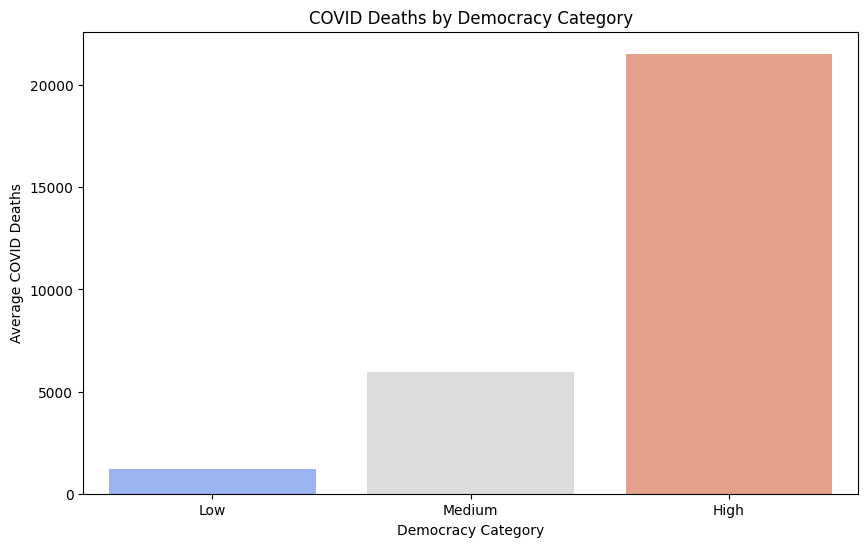

In [62]:

# Categorize Democracy Scores into Low, Medium, and High
bins = [0, 3, 6, 10]
labels = ['Low', 'Medium', 'High']
dem_deaths['Democracy_Category'] = pd.cut(dem_deaths['Democracy_Scores'], bins=bins, labels=labels, right=True)

# Group by Democracy Category to calculate total deaths
grouped_dem_deaths = dem_deaths.groupby('Democracy_Category').agg(
    Total_Deaths=('Total_Deaths', 'mean'),
).reset_index()

# Create the bar plot for Total COVID Deaths by Democracy Category
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_dem_deaths, x='Democracy_Category', y='Total_Deaths', palette='coolwarm')
plt.title('COVID Deaths by Democracy Category')
plt.xlabel('Democracy Category')
plt.ylabel('Average COVID Deaths')
plt.show()





In [ ]:
# answering the last question with a new dataset

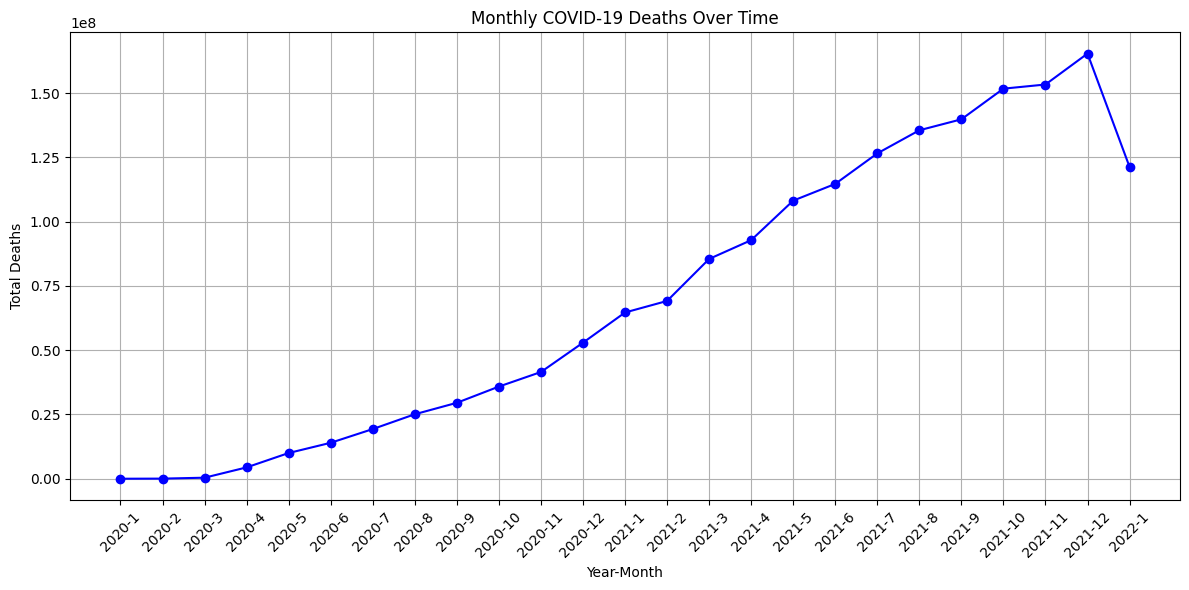

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset and convert 'Date' column to datetime format if not done already
df_covid = pd.read_csv('/content/cleaned_covid_data.csv')
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

# Step 2: Extract Year and Month from the Date
df_covid['Year'] = df_covid['Date'].dt.year
df_covid['Month'] = df_covid['Date'].dt.month

# Step 3: Group by Year and Month to get monthly deaths
monthly_deaths = df_covid.groupby(['Year', 'Month'])['Deaths'].sum().reset_index()

# Create a new column 'YearMonth' to help with plotting
monthly_deaths['YearMonth'] = monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_deaths['YearMonth'], monthly_deaths['Deaths'], marker='o', linestyle='-', color='blue')
plt.title('Monthly COVID-19 Deaths Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


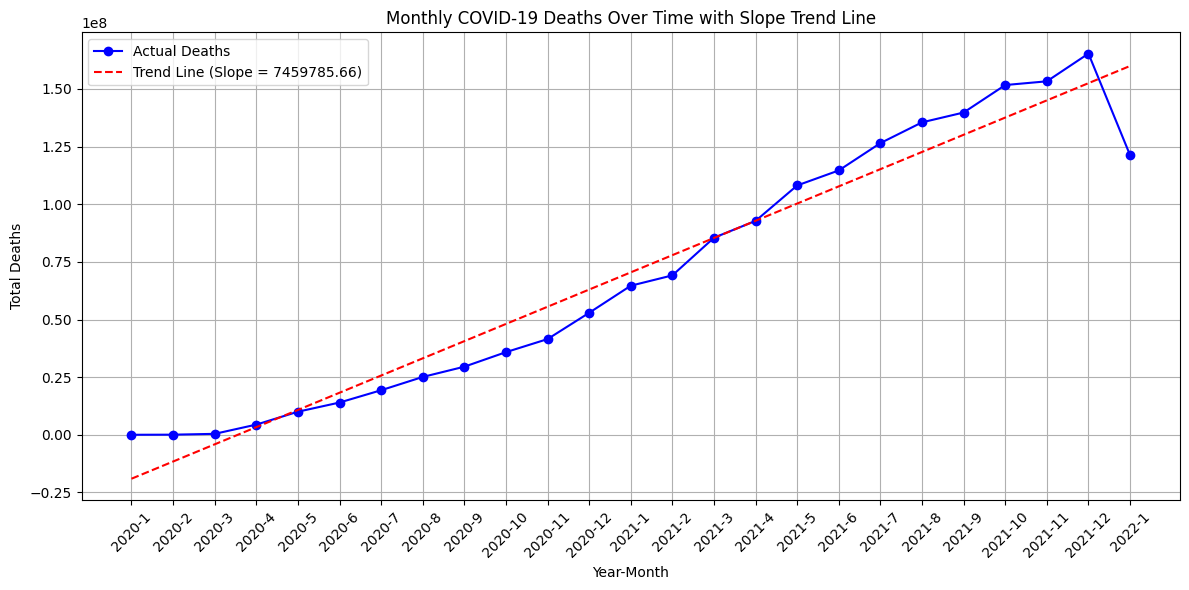

The slope of the trend line is: 7459785.66 deaths per month


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
df_covid = pd.read_csv('/content/cleaned_covid_data.csv')
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

# Step 2: Extract Year and Month
df_covid['Year'] = df_covid['Date'].dt.year
df_covid['Month'] = df_covid['Date'].dt.month

# Step 3: Group by Year and Month and aggregate deaths
monthly_deaths = df_covid.groupby(['Year', 'Month'])['Deaths'].sum().reset_index()
monthly_deaths['YearMonth'] = monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str)

# Step 4: Calculate the time index for fitting the slope
monthly_deaths['Time_Index'] = np.arange(len(monthly_deaths))

# Step 5: Fit a linear model and get the slope using numpy's polyfit
slope, intercept = np.polyfit(monthly_deaths['Time_Index'], monthly_deaths['Deaths'], 1)

# Step 6: Plot the data and the trend line
plt.figure(figsize=(12, 6))

# Plot the actual deaths
plt.plot(monthly_deaths['YearMonth'], monthly_deaths['Deaths'], label='Actual Deaths', color='blue', marker='o')

# Plot the trend line using the slope
plt.plot(monthly_deaths['YearMonth'], intercept + slope * monthly_deaths['Time_Index'], label=f'Trend Line (Slope = {slope:.2f})', color='red', linestyle='--')

# Adding labels and title
plt.title('Monthly COVID-19 Deaths Over Time with Slope Trend Line')
plt.xlabel('Year-Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Display the slope
print(f"The slope of the trend line is: {slope:.2f} deaths per month")
